In [52]:
import numpy as np
import pandas as pd
%matplotlib inline 


In [53]:
import statsmodels.api as sm

In [54]:
from sklearn.model_selection import cross_val_score, train_test_split, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Ridge, RidgeCV,Lasso, LassoCV, ElasticNet,ElasticNetCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings('ignore')

In [79]:
pd.set_option('display.max_columns', None) # displays all pd columns

In [80]:
housing = pd.read_csv('../../Ames_HousePrice.csv', index_col=0)

In [81]:
real_estate = pd.read_csv('../../Ames Real Estate Data.csv', index_col=0)

In [82]:
price = housing["SalePrice"]

In [83]:
int_df = housing.select_dtypes(include='int64')
int_df

,PID,GrLivArea,SalePrice,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,2ndFlrSF,LowQualFinSF,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
1,909176150,856,126000,30,7890,6,6,1939,1950,856,0,0,1,0,2,1,4,1,0,0,0,0,166,0,0,3,2010
2,905476230,1049,139500,120,4235,5,5,1984,1984,1049,0,0,2,0,2,1,5,0,0,105,0,0,0,0,0,2,2009
3,911128020,1001,124900,30,6060,5,9,1930,2007,1001,0,0,1,0,2,1,5,0,154,0,42,86,0,0,0,11,2007
4,535377150,1039,114000,70,8146,4,8,1900,2003,717,322,0,1,0,2,1,6,0,0,0,168,0,111,0,0,5,2009
5,534177230,1665,227000,60,8400,8,6,2001,2001,810,855,0,2,1,3,1,6,0,0,45,0,0,0,0,0,11,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,903205040,952,121000,30,8854,6,6,1916,1950,952,0,0,1,0,2,1,4,1,0,98,0,0,40,0,0,5,2009
760,905402060,1733,139600,20,13680,3,5,1955,1955,1733,0,0,2,0,4,1,8,1,0,0,0,0,0,0,0,6,2009
761,909275030,2002,145000,90,6270,5,6,1949,1950,1001,1001,0,2,0,4,2,8,0,0,0,0,0,0,0,0,8,2007
762,907192040,1842,217500,60,8826,7,5,2000,2000,985,857,0,2,1,3,1,7,1,193,96,0,0,0,0,0,7,2007


In [84]:
int_df.isnull().sum().sort_values(axis=0, ascending=False)

PID              0
BedroomAbvGr     0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
Fireplaces       0
TotRmsAbvGrd     0
KitchenAbvGr     0
HalfBath         0
GrLivArea        0
FullBath         0
LowQualFinSF     0
2ndFlrSF         0
1stFlrSF         0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
OverallQual      0
LotArea          0
MSSubClass       0
SalePrice        0
YrSold           0
dtype: int64

In [85]:
x = sm.add_constant(int_df)
model = sm.OLS(np.log(price), x)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     1546.
Date:                Fri, 20 May 2022   Prob (F-statistic):               0.00
Time:                        13:09:07   Log-Likelihood:                 2422.4
No. Observations:                2580   AIC:                            -4791.
Df Residuals:                    2553   BIC:                            -4633.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.1540      2.921      3.477

In [86]:
rm_pvalues = results.pvalues[results.pvalues > 0.05]
rm_pvalues

PID             0.313170
MSSubClass      0.068097
2ndFlrSF        0.727850
LowQualFinSF    0.855165
HalfBath        0.339207
TotRmsAbvGrd    0.445227
WoodDeckSF      0.291387
OpenPorchSF     0.506901
3SsnPorch       0.099312
PoolArea        0.669934
MiscVal         0.770867
MoSold          0.837923
YrSold          0.103881
dtype: float64

In [87]:
int_df.drop(columns=rm_pvalues.index, inplace=True)

In [88]:
int_df

,GrLivArea,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,FullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,EnclosedPorch,ScreenPorch
1,856,126000,7890,6,6,1939,1950,856,1,2,1,1,0,166
2,1049,139500,4235,5,5,1984,1984,1049,2,2,1,0,0,0
3,1001,124900,6060,5,9,1930,2007,1001,1,2,1,0,42,0
4,1039,114000,8146,4,8,1900,2003,717,1,2,1,0,168,111
5,1665,227000,8400,8,6,2001,2001,810,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,952,121000,8854,6,6,1916,1950,952,1,2,1,1,0,40
760,1733,139600,13680,3,5,1955,1955,1733,2,4,1,1,0,0
761,2002,145000,6270,5,6,1949,1950,1001,2,4,2,0,0,0
762,1842,217500,8826,7,5,2000,2000,985,2,3,1,1,0,0


In [89]:
# int_df.SalePrice = np.log1p(int_df.SalePrice)
# y = int_df.SalePrice

In [90]:
y = int_df.SalePrice

In [91]:
int_df.drop(columns='SalePrice', inplace=True)
int_df

,GrLivArea,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,1stFlrSF,FullBath,BedroomAbvGr,KitchenAbvGr,Fireplaces,EnclosedPorch,ScreenPorch
1,856,7890,6,6,1939,1950,856,1,2,1,1,0,166
2,1049,4235,5,5,1984,1984,1049,2,2,1,0,0,0
3,1001,6060,5,9,1930,2007,1001,1,2,1,0,42,0
4,1039,8146,4,8,1900,2003,717,1,2,1,0,168,111
5,1665,8400,8,6,2001,2001,810,2,3,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
759,952,8854,6,6,1916,1950,952,1,2,1,1,0,40
760,1733,13680,3,5,1955,1955,1733,2,4,1,1,0,0
761,2002,6270,5,6,1949,1950,1001,2,4,2,0,0,0
762,1842,8826,7,5,2000,2000,985,2,3,1,1,0,0


In [92]:
# Partition the dataset in train + validation sets
X_train, X_test, y_train, y_test = train_test_split(int_df, y, test_size = 0.3, random_state = 0)
print("X_train : " + str(X_train.shape))
print("X_test : " + str(X_test.shape))
print("y_train : " + str(y_train.shape))
print("y_test : " + str(y_test.shape))

X_train : (1806, 13)
X_test : (774, 13)
y_train : (1806,)
y_test : (774,)


In [69]:
# #pull in Caroline's train-test split
# X_train = pd.read_csv('../../group train-test split/X_train42.csv', index_col=0)
# X_test = pd.read_csv('../../group train-test split/X_test42.csv', index_col=0)
# y_train = pd.read_csv('../../group train-test split/y_train42.csv', index_col=0)
# y_test = pd.read_csv('../../group train-test split/y_test42.csv', index_col=0)

# # ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [70]:
# X_train.isnull().sum().sort_values(axis=0, ascending=False)

In [93]:
# Define error measure for official scoring : RMSE
scorer = make_scorer(mean_squared_error, greater_is_better = False)

def rmse_cv_train(model):
    rmse= np.sqrt(-cross_val_score(model, X_train, y_train, scoring = scorer, cv = 10))
    return(rmse)

def rmse_cv_test(model):
    rmse= np.sqrt(-cross_val_score(model, X_test, y_test, scoring = scorer, cv = 10))
    return(rmse)

Best alpha : 6.0
Try again for more precision with alphas centered around 6.0
Best alpha : 8.399999999999999
Ridge RMSE on Training set : 31408.66036087167
Ridge RMSE on Test set : 30158.931712864276


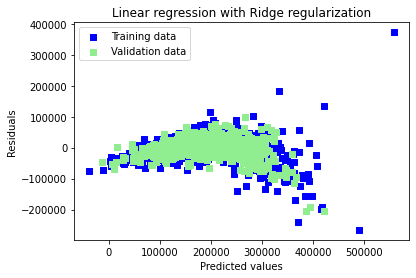

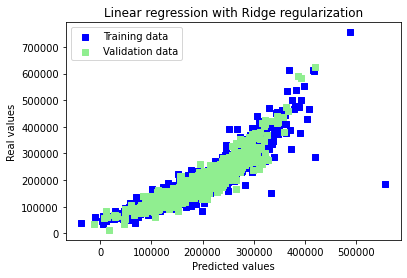

Ridge picked 13 features and eliminated the other 0 features


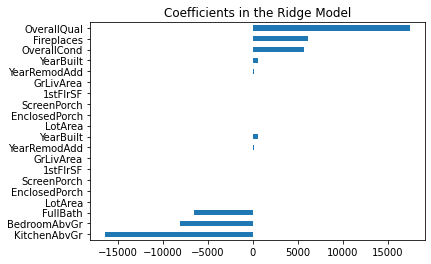

In [94]:
# 2* Ridge
ridge = RidgeCV(alphas = [0.01, 0.03, 0.06, 0.1, 0.3, 0.6, 1, 3, 6, 10, 30, 60])
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Try again for more precision with alphas centered around " + str(alpha))
ridge = RidgeCV(alphas = [alpha * .6, alpha * .65, alpha * .7, alpha * .75, alpha * .8, alpha * .85, 
                          alpha * .9, alpha * .95, alpha, alpha * 1.05, alpha * 1.1, alpha * 1.15,
                          alpha * 1.25, alpha * 1.3, alpha * 1.35, alpha * 1.4], 
                cv = 10)
ridge.fit(X_train, y_train)
alpha = ridge.alpha_
print("Best alpha :", alpha)

print("Ridge RMSE on Training set :", rmse_cv_train(ridge).mean())
print("Ridge RMSE on Test set :", rmse_cv_test(ridge).mean())
y_train_rdg = ridge.predict(X_train)
y_test_rdg = ridge.predict(X_test)

# Plot residuals
plt.scatter(y_train_rdg, y_train_rdg - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test_rdg - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
#plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()

# Plot predictions
plt.scatter(y_train_rdg, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test_rdg, y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression with Ridge regularization")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
#plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

# Plot important coefficients
coefs = pd.Series(ridge.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

In [95]:
# Define models
model_lin = LinearRegression()
model_ridge = Ridge(alpha = 0.001)
model_lasso = Lasso(alpha = 0.001)
#model_tree = DecisionTreeRegressor()
#model_ran = RandomForestRegressor()
#model_xg = XGBRegressor()

In [96]:
from sklearn.metrics import mean_squared_error, r2_score

# Define a function for each metric
# R²
def rsqr_score(test, pred):
    """Calculate R squared score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        R squared score 
    """
    r2_ = r2_score(test, pred)
    return r2_


# RMSE
def rmse_score(test, pred):
    """Calculate Root Mean Square Error score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        Root Mean Square Error score
    """
    rmse_ = np.sqrt(mean_squared_error(test, pred))
    return rmse_


# Print the scores
def print_score(test, pred, model):
    """Print calculated score 

    Args:
        test -- test data
        pred -- predicted data

    Returns:
        print the regressor name
        print the R squared score
        print Root Mean Square Error score
    """
    
    print(f"- Regressor: {model}")
    print(f"R²: {rsqr_score(test, pred)}")
    print(f"RMSE: {rmse_score(test, pred)}\n")

In [97]:
scores_ridge = cross_val_score(model_ridge, X_train, y_train,
                                cv=5)

print("Mean scores (Ridge Model):\n", np.mean(scores_ridge))
print("Standard deviation of scores (Ridge Model):\n", np.std(scores_ridge))

Mean scores (Ridge Model):
 0.8152645629857801
Standard deviation of scores (Ridge Model):
 0.05168508089123785


In [98]:
scores_ridge_mse = -1 * cross_val_score(model_ridge, X_train, y_train,
                                      cv=5,
                                      scoring='neg_mean_squared_error')

print("MSE scores (Ridge Model):\n", scores_ridge_mse)
print("Mean MSE scores:", scores_ridge_mse.mean())

MSE scores (Ridge Model):
 [1.30250177e+09 9.32544169e+08 6.81105159e+08 7.61433097e+08
 1.47426387e+09]
Mean MSE scores: 1030369612.0030731


In [99]:
model_ridge.fit(X_train, y_train)
y_pred_ridge = model_ridge.predict(X_test)
print_score(y_test, y_pred_ridge, "Ridge")

- Regressor: Ridge
R²: 0.8385739215227456
RMSE: 29975.382956506084



In [100]:
model_ridge.fit(X_train, np.log(y_train))
logy_pred_ridge = model_ridge.predict(X_test)
print_score(y_test, np.exp(logy_pred_ridge), "log_ridge_inputs")

- Regressor: log_ridge_inputs
R²: 0.8890936964001815
RMSE: 24845.97291133183



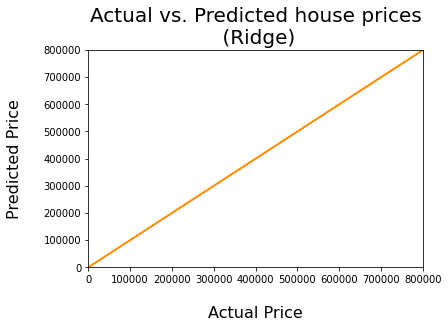

In [78]:
plt.figure()
plt.title("Actual vs. Predicted house prices\n (Ridge)", fontsize=20)
plt.scatter(np.exp(y_test), np.exp(y_pred_ridge),
            color="deepskyblue", marker="o", facecolors="none")
plt.plot([0, 800000], [0, 800000], "darkorange", lw=2)
plt.xlim(0, 800000)
plt.ylim(0, 800000)
plt.xlabel("\nActual Price", fontsize=16)
plt.ylabel("Predicted Price\n", fontsize=16)
plt.show()